### Choice of Interpolation Method for Resizing

#### cv2.INTER_AREA: This is used when we need need to shrink an image.
#### cv2.INTER_CUBIC: This is slow but more efficient.
#### cv2.INTER_LINEAR: This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.

### Below is the code for resizing.


(2592, 3872, 3)


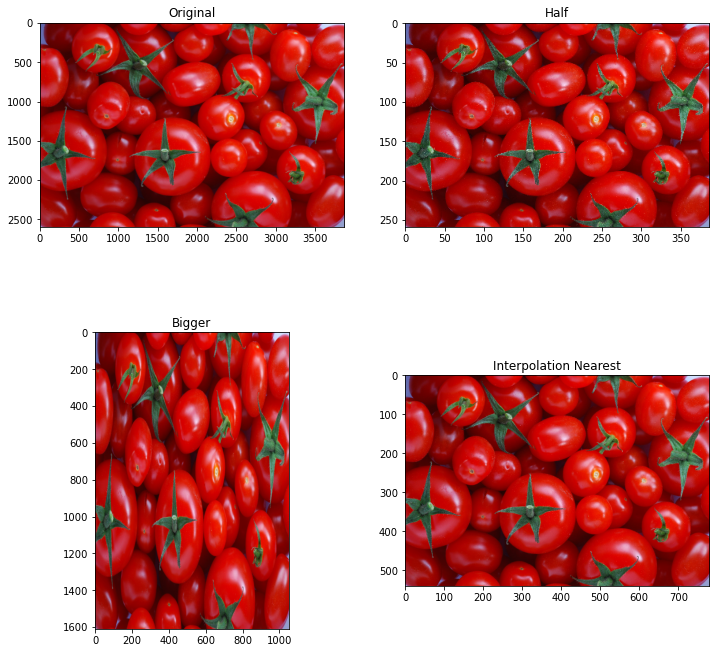

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# %matplotlib qt 
# This is a magic command to display in an external window 

image = cv2.imread("img/Tomatoes.jpg",1)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Loading the image 
print(image.shape)
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1) 
bigger = cv2.resize(image, (1050, 1610)) 

stretch_near = cv2.resize(image, (780, 540), 
			interpolation = cv2.INTER_NEAREST) 


Titles =["Original", "Half", "Bigger", "Interpolation Nearest"] 
images =[image, half, bigger, stretch_near] 
count = 4
plt.figure(figsize=(12, 12))
for i in range(count): 
	plt.subplot(2, 2, i + 1) 
	plt.title(Titles[i]) 
	plt.imshow(images[i]) 
plt.show() 


### Image Processing in Python (Scaling, Rotating, Shifting and Edge Detection)

### Scaling an Image :-

#### Scaling operation increases/reduces size of an image.

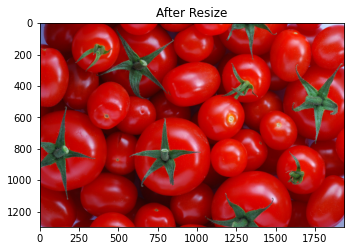

In [26]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

FILE_NAME = "img/Tomatoes.jpg"


try: 
	# Read image from disk. 
    img = cv2.imread(FILE_NAME)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    

	# Get number of pixel horizontally and vertically. 
    (height, width) = img.shape[:2] 

	# Specify the size of image along with interploation methods. 
	# cv2.INTER_AREA is used for shrinking, whereas cv2.INTER_CUBIC 
	# is used for zooming. 
    res = cv2.resize(img, (int(width / 2), int(height / 2)), interpolation = cv2.INTER_CUBIC) 

	# Write image back to disk. 
    cv2.imwrite('result.jpg', res) 
    
except IOError: 
    print ('Error while reading files !!!') 

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1) 
plt.title("After Resize") 
plt.imshow(res) 


### Rotating an image :-

#### Images can be rotated to any degree clockwise or otherwise. We just need to define rotation matrix listing rotation point, degree of rotation and the scaling factor.

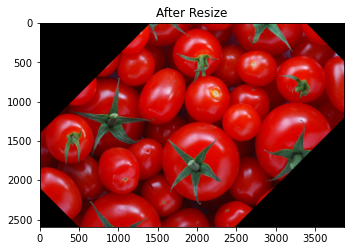

In [27]:
import cv2 
import numpy as np 

FILE_NAME = 'img/Tomatoes.jpg'
try: 
	# Read image from the disk. 
    img = cv2.imread(FILE_NAME) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
	# Shape of image in terms of pixels. 
    (rows, cols) = img.shape[:2] 

	# getRotationMatrix2D creates a matrix needed for transformation. 
	# We want matrix for rotation w.r.t center to 45 degree without scaling. 
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1) # Rotation Point, angle , zoom or not
    res = cv2.warpAffine(img, M, (cols, rows)) 

	# Write image back to disk. 
    cv2.imwrite('result.jpg', res) 
except IOError: 
    print ('Error while reading files !!!') 
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1) 
plt.title("After Resize") 
plt.imshow(res) 

### Translating an Image :-

#### Translating an image means shifting it within a given frame of reference.

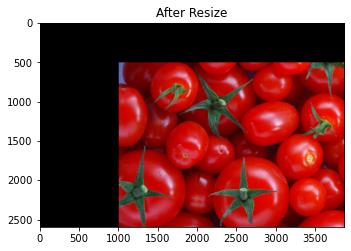

In [28]:
import cv2 
import numpy as np 

FILE_NAME = 'img/Tomatoes.jpg'
# Create translation matrix. 
# If the shift is (x, y) then matrix would be 
# M = [1 0 x] 
#	 [0 1 y] 
# Let's shift by (100, 50). 
M = np.float32([[1, 0, 1000], [0, 1, 500]]) 

try: 

	# Read image from disk. 
    img = cv2.imread(FILE_NAME)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    (rows, cols) = img.shape[:2] 

	# warpAffine does appropriate shifting given the 
	# translation matrix. 
    res = cv2.warpAffine(img, M, (cols, rows)) 

	# Write image back to disk. 
    cv2.imwrite('result.jpg', res) 

except IOError: 
    print ('Error while reading files !!!') 

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1) 
plt.title("After Resize") 
plt.imshow(res) 

### Edge detection in an Image :-

The process of image detection involves detecting sharp edges in the image. This edge detection is essential in context of image recognition or object localization/detection. There are several algorithms for detecting edges due to it’s wide applicability. We’ll be using one such algorithm known as Canny Edge Detection.

#### The general criteria for edge detection include:

1. Detection of edge with low error rate, which means that the detection should accurately catch as many edges shown in the image as possible
2. The edge point detected from the operator should accurately localize on the center of the edge.
3. A given edge in the image should only be marked once, and where possible, image noise should not create false edges.

#### Process of Canny edge detection algorithm

The Process of Canny edge detection algorithm can be broken down to 5 different steps:

1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Find the intensity gradients of the image
3. Apply non-maximum suppression to get rid of spurious response to edge detection
4. Apply double threshold to determine potential edges
5. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

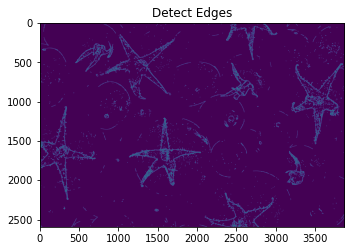

In [29]:
import cv2 
import numpy as np 

FILE_NAME = 'img/Tomatoes.jpg'
try: 
	# Read image from disk. 
    img = cv2.imread(FILE_NAME) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

	# Canny edge detection. 
    edges = cv2.Canny(img, 100, 200) 

	# Write image back to disk. 
    cv2.imwrite('result.jpg', edges) 
except IOError: 
    print ('Error while reading files !!!') 

plt.figure(figsize=(12,12))  
plt.subplot(2, 2, 1) 
plt.title("Detect Edges") 
plt.imshow(edges) 


### Image blurring using OpenCV

#### Image Blurring : refers to making the image less clear or distinct. It is done with the help of various low pass filter kernels.

### Median Blur, Bilateral Blur

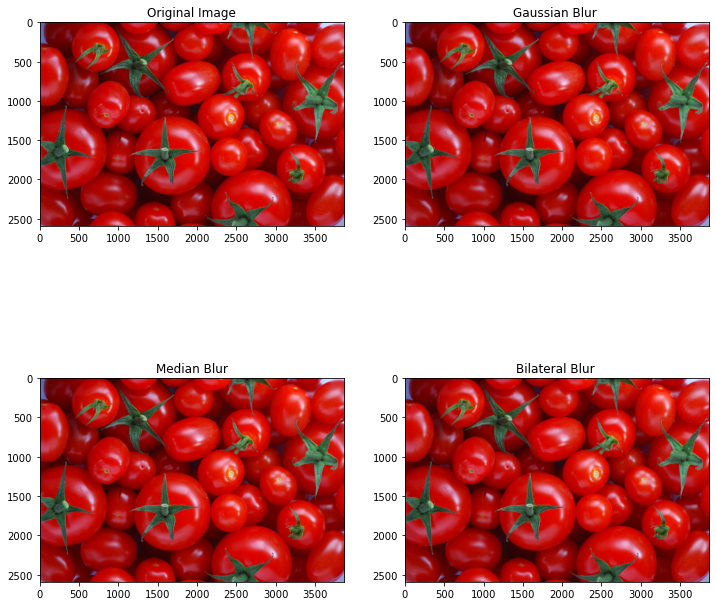

In [30]:
# importing libraries 
import cv2 
import numpy as np 

image = cv2.imread('img/Tomatoes.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

#cv2.imshow('Original Image', image) 
#cv2.waitKey(0) 

# Gaussian Blur 
Gaussian = cv2.GaussianBlur(image, (7, 7), 0) 
# cv2.imshow('Gaussian Blurring', Gaussian) 
# cv2.waitKey(0) 

# Median Blur 
median = cv2.medianBlur(image, 5) 
# cv2.imshow('Median Blurring', median) 
# cv2.waitKey(0) 


# Bilateral Blur 
bilateral = cv2.bilateralFilter(image, 9, 75, 75) 
# cv2.imshow('Bilateral Blurring', bilateral) 
# cv2.waitKey(0) 
# cv2.destroyAllWindows() 


Titles =["Original Image","Gaussian Blur ", "Median Blur", "Bilateral Blur "] 
images =[image, Gaussian, median, bilateral] 
count = 4
plt.figure(figsize=(12, 12))
for i in range(count): 
	plt.subplot(2, 2, i + 1) 
	plt.title(Titles[i]) 
	plt.imshow(images[i]) 
plt.show() 